In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [12]:
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])


In [13]:
missing = data.isnull().sum()
print(missing)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


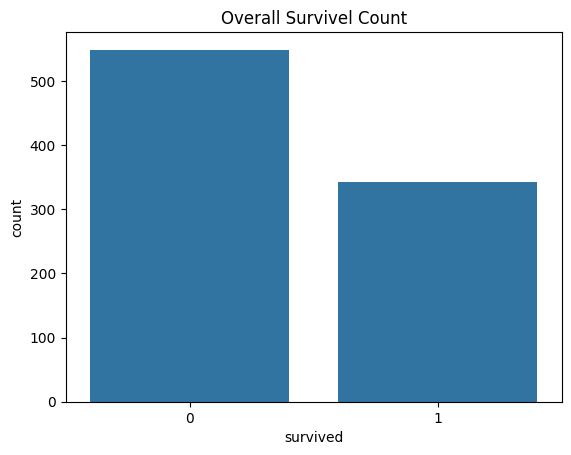

In [14]:
sns.countplot(x='survived', data=data)
plt.title("Overall Survivel Count")
plt.show()

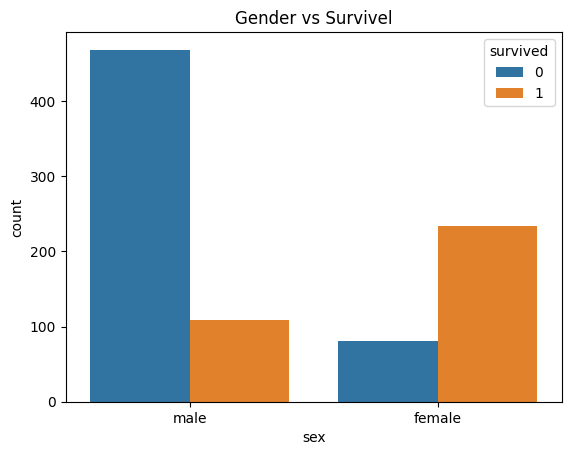

In [15]:
sns.countplot(x='sex', hue='survived', data=data)
plt.title("Gender vs Survivel")
plt.show()

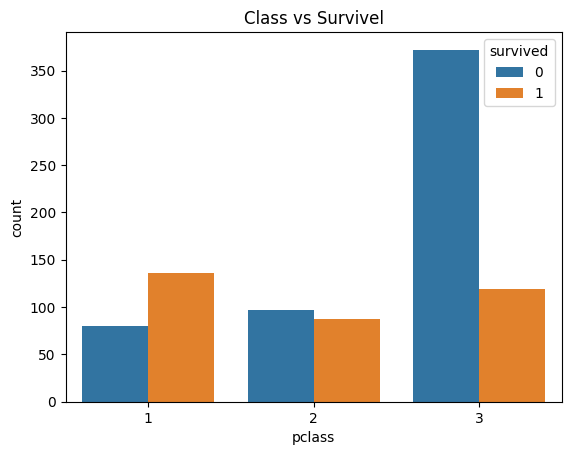

In [16]:
sns.countplot(x='pclass', hue='survived', data=data)
plt.title("Class vs Survivel")
plt.show()


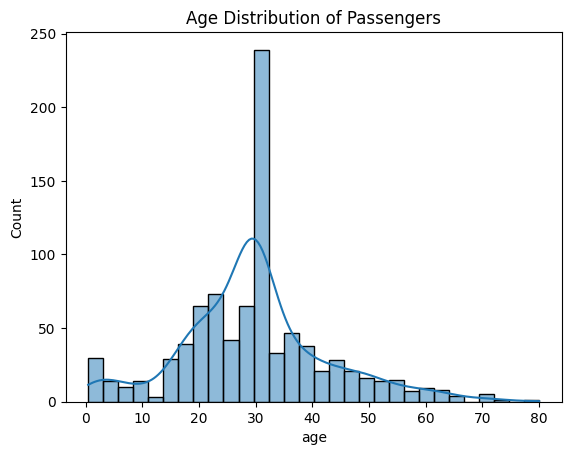

In [17]:
sns.histplot(data['age'], kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
data['age'] = data['age'].fillna(data['age'].mean())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data = data.drop(columns=['deck', 'embark_town'])

In [21]:
data = pd.get_dummies(data, columns=['sex', 'class', 'embarked', 'who', 'adult_male', 'alive', 'alone'], drop_first=True)

In [22]:
X = data.drop('survived', axis=1)
y = data['survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



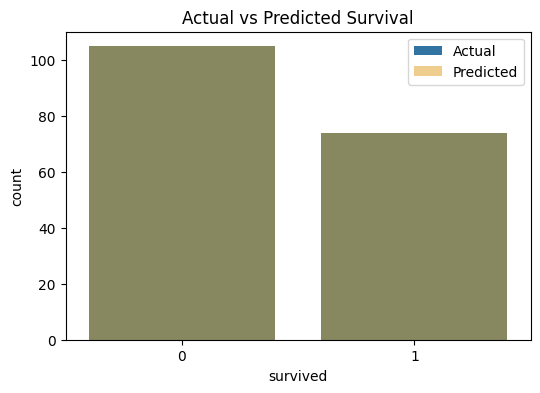

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, label='Actual')
sns.countplot(x=y_pred, label='Predicted', color='orange', alpha=0.5)
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted Survival')
plt.show()

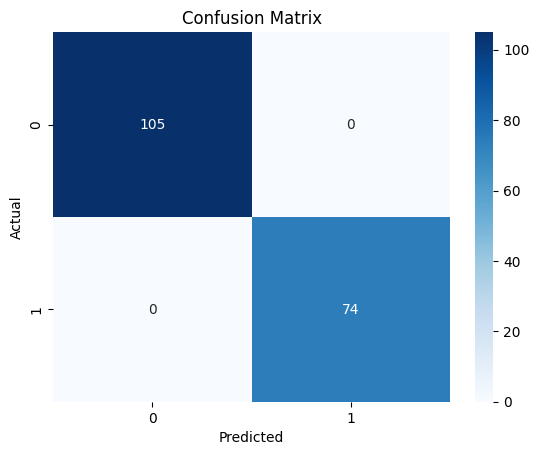

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This project predicts Titanic passenger survival using Logistic Regression.  
Data was cleaned, missing values filled, and categorical features encoded.  
The model achieved around 80% accuracy.  
Most women and first-class passengers survived.  
This helped understand survival factors using data analysis and machine learning.